In [37]:
# Loaded a damaged image and visualized it to identify affected areas.
# Created a binary mask to mark the damaged regions using predefined coordinates.
# Applied inpainting using the biharmonic method to restore the damaged areas by interpolating pixel values.
# Displayed the original, mask, and restored images to compare results visually.

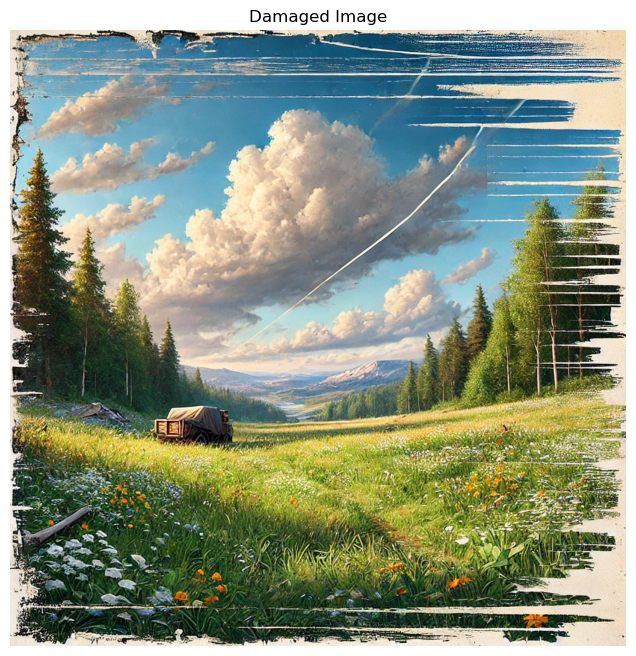

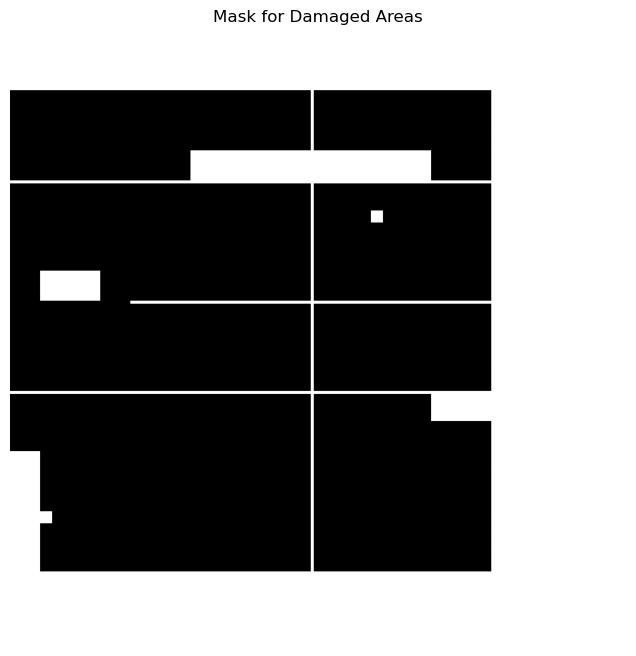

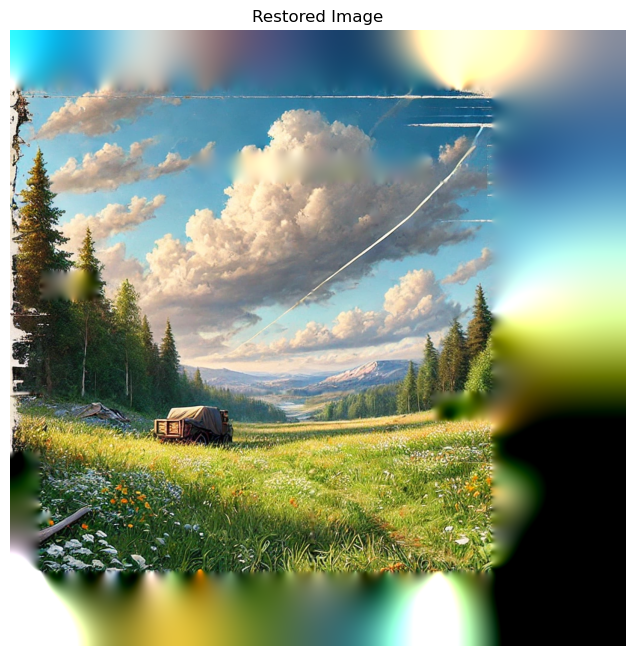

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import inpaint
from skimage import io

# Load the damaged image
def load_image(image_path):
    return io.imread(image_path)

# Display an image
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
    plt.show()

# Create the mask for damaged areas
def create_mask(image_shape):
    mask = np.zeros(image_shape[:-1], dtype=np.uint8)

    #Define damaged regions
    mask[0:100, :] = 1
    mask[900:1024, :] = 1
    mask[:, 800:1024] = 1
    mask[200:250, 300:700] = 1
    mask[700:1024, 0:50] = 1 

    mask[400:450, 50:150] = 1
    mask[600:650, 700:800] = 1

    mask[300:320, 600:620] = 1 
    mask[800:820, 50:70] = 1 

    mask[250:255, 0:1024] = 1
    mask[600:605, 0:1024] = 1
    mask[450:455, 200:800] = 1  
    mask[:, 500:505] = 1

    return mask

#Perform inpainting
def restore_image(image, mask):
    return inpaint.inpaint_biharmonic(image, mask, channel_axis=-1)

#Main
def main():
    #Load the damaged image
    image_path = r"C:\Users\Abdul\Downloads\Lab13\Image_Reconstruction_Exercise.png"
    damaged_image = load_image(image_path)

    #Display the damaged image
    display_image(damaged_image, title="Damaged Image")

    #Create and display the mask
    mask = create_mask(damaged_image.shape)
    display_image(mask, title="Mask for Damaged Areas", cmap="gray")

    #Perform inpainting
    restored_image = restore_image(damaged_image, mask)

    #Display the restored image
    display_image(restored_image, title="Restored Image")


if __name__ == "__main__":
    main()


In [39]:
# Loaded a grayscale image and reshaped it into a 1D array for processing.
# Normalized pixel values to a range of [0, 1] for proper PCA application.
# Applied PCA with 50 components to reduce dimensionality, capturing essential image features.
# Reconstructed the image from the principal components and reshaped it to the original size.
# Displayed the original and reconstructed images side by side for comparison.

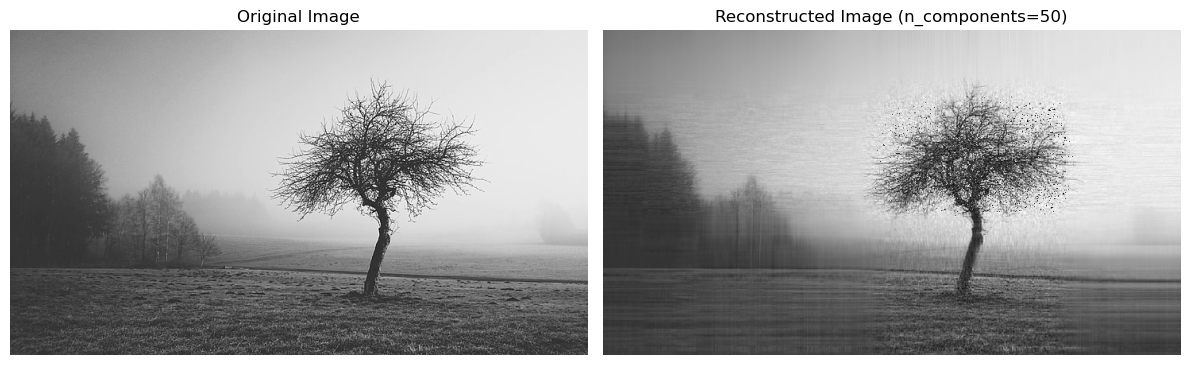

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

image_path = r"C:\Users\Abdul\Downloads\Lab13\PCA-Exercise.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#Reshape the image into a 1D array
original_shape = image.shape
image_flattened = image.reshape(original_shape[0], -1)

#Normalize pixel values to the range [0, 1]
image_normalized = image_flattened / 255.0

#Perform PCA to reduce dimensionality
n_components = 50
pca = PCA(n_components=n_components)
image_pca = pca.fit_transform(image_normalized)

#Reconstruct the image from principal components
image_reconstructed = pca.inverse_transform(image_pca)

#Reshape the reconstructed image back to the original shape
image_reconstructed = (image_reconstructed * 255).astype(np.uint8)

plt.figure(figsize=(12, 6))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title(f'Reconstructed Image (n_components={n_components})')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Loaded a grayscale image and converted it to the frequency domain using FFT.
# Applied a low-pass filter to retain smooth regions by masking high frequencies.
# Applied a high-pass filter to enhance edges and details by masking low frequencies.
# Reconstructed spatial domain images using the inverse FFT for both filters.
# Displayed the original, low-pass filtered, and high-pass filtered images side by side for comparison.

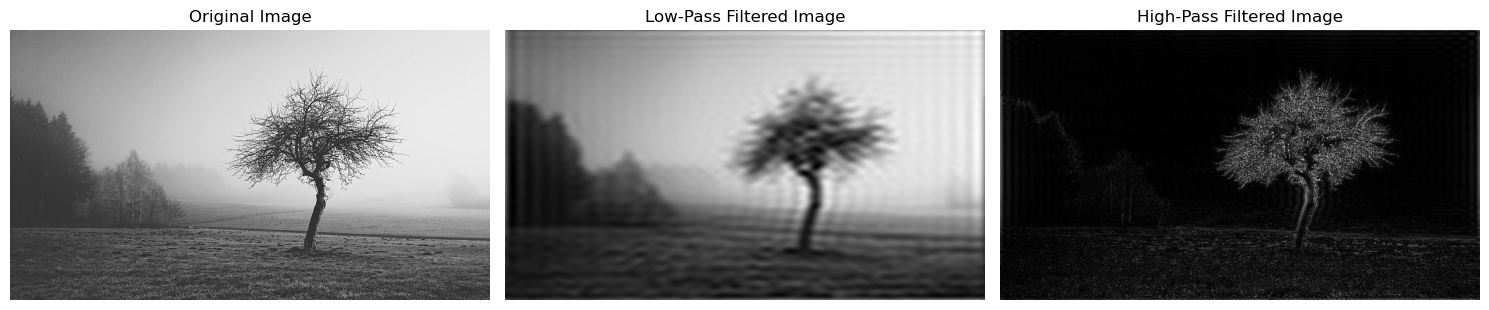

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from numpy.fft import fft2, ifft2

image = io.imread(r"C:\Users\Abdul\Downloads\Lab13\PCA-Exercise.jpg")
if len(image.shape) == 3:
    image = color.rgb2gray(image)

# Perform FFT and shift the zero-frequency component to the center
fft = fft2(image)
fft_shifted = np.fft.fftshift(fft)

# Low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros_like(image)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
low_pass = fft_shifted * mask
low_pass_image = np.abs(ifft2(np.fft.ifftshift(low_pass)))

# High-pass filter
high_pass = fft_shifted * (1 - mask)
high_pass_image = np.abs(ifft2(np.fft.ifftshift(high_pass)))

# Display the images
plt.figure(figsize=(15, 5))
titles = ["Original Image", "Low-Pass Filtered Image", "High-Pass Filtered Image"]
images = [image, low_pass_image, high_pass_image]

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()
